# Forecasting & Modelling

In [1]:

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import joblib

    

# Dataset Loading

In [2]:
df = pd.read_csv('../data/Assessment-2-Associate-DS(in).csv')
df['weekend_date'] = pd.to_datetime(df['weekend_date'], dayfirst=True, errors='coerce')
df = df.sort_values('weekend_date')

In [3]:
weekly_sales = df.groupby('weekend_date')['quantity'].sum().reset_index()
weekly_sales.set_index('weekend_date', inplace=True)
weekly_sales = weekly_sales.asfreq('W-SUN')
weekly_sales['quantity'] = weekly_sales['quantity'].fillna(0)
weekly_sales.tail()

,quantity
weekend_date,
2024-07-28,0.0
2024-08-04,0.0
2024-08-11,0.0
2024-08-18,0.0
2024-08-25,0.0


# Training

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import joblib


prepare time series

In [50]:
# Ensure date is datetime and sorted
df['weekend_date'] = pd.to_datetime(df['weekend_date'])
df = df.sort_values('weekend_date')

# Set weekend_date as index
df.set_index('weekend_date', inplace=True)

# Extract the univariate series
series = df['quantity']


Split Data

In [ ]:

split = int(0.8 * len(series))
train, test = series[:split], series[split:]


In [52]:
# ARMA(p, q) is ARIMA(p, 0, q)
model = ARIMA(train, order=(2, 0, 2))  # try (2,0,2), can tune later
results = model.fit()


d:\IntelliMark\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\IntelliMark\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\IntelliMark\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


forecast and evaluate

d:\IntelliMark\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\IntelliMark\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MSE: 1017641.4215410339


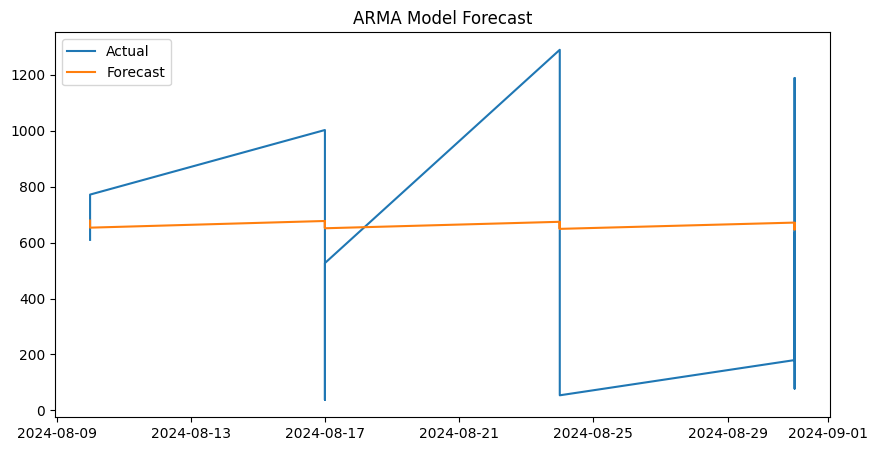

In [53]:
# Forecast same length as test
forecast = results.forecast(steps=len(test))

# Evaluate
mse = mean_squared_error(test, forecast)
print("MSE:", mse)

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('ARMA Model Forecast')
plt.show()


d:\IntelliMark\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\IntelliMark\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MSE: 1017641.4215410339


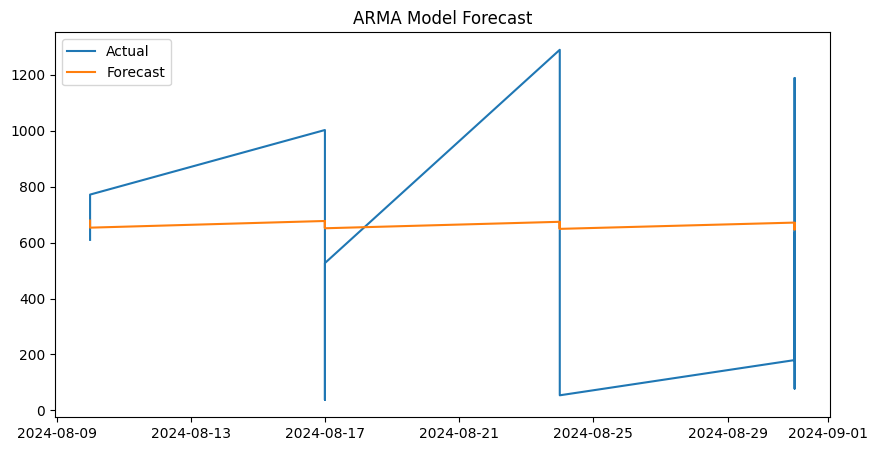

In [57]:
# Forecast same length as test
forecast = results.forecast(steps=len(test))

# Evaluate
mse = mean_squared_error(test, forecast)
print("MSE:", mse)

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title('ARMA Model Forecast')
plt.show()


Checking Accuracy 

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Accuracy metrics
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

# Print results
print("📊 Model Accuracy Metrics:")
print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ R² Score: {r2:.4f}")

📊 Model Accuracy Metrics:
✅ Mean Squared Error (MSE): 1017641.42
✅ Root Mean Squared Error (RMSE): 1008.78
✅ Mean Absolute Error (MAE): 577.30
✅ R² Score: -0.0055


In [4]:
val_start = '2024-06-01'
val_end = '2024-08-31'
train = weekly_sales.loc[:val_start].iloc[:-1]  # up to week before validation\n",
val = weekly_sales.loc[val_start:val_end]
print(f'Train shape: {train.shape}, Validation shape: {val.shape}')            

Train shape: (104, 1), Validation shape: (13, 1)


In [5]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['quantity'], order=(1,1,1))
model_fit = model.fit()

joblib.dump(model_fit, '../models/arima_model.joblib')

d:\IntelliMark\env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['../models/arima_model.joblib']

In [ ]:

n_val = len(val)
val_pred = model_fit.forecast(steps=n_val)
val = val.copy()
val['predicted'] = val_pred.values

val['month'] = val.index.to_period('M')
monthly_acc = val.groupby('month').apply(lambda x: 1 - np.sum(np.abs(x['predicted'] - x['quantity'])) / np.sum(x['quantity']))
monthly_acc = monthly_acc.rename('accuracy')
monthly_acc

C:\Users\jc963\AppData\Local\Temp\ipykernel_12104\3513942359.py:7: RuntimeWarning: invalid value encountered in scalar divide
  monthly_acc = val.groupby('month').apply(lambda x: 1 - np.sum(np.abs(x['predicted'] - x['quantity'])) / np.sum(x['quantity']))
C:\Users\jc963\AppData\Local\Temp\ipykernel_12104\3513942359.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_acc = val.groupby('month').apply(lambda x: 1 - np.sum(np.abs(x['predicted'] - x['quantity'])) / np.sum(x['quantity']))


month
2024-06   NaN
2024-07   NaN
2024-08   NaN
Freq: M, Name: accuracy, dtype: float64

# Forecasting 

In [7]:
import datetime
last_date = weekly_sales.index.max()
future_weeks = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=13, freq='W-SUN')
future_pred = model_fit.forecast(steps=13)
forecast_df = pd.DataFrame({'weekend_date': future_weeks, 'predicted_quantity': future_pred.values})
forecast_df

,weekend_date,predicted_quantity
0,2024-09-01,0.0
1,2024-09-08,0.0
2,2024-09-15,0.0
3,2024-09-22,0.0
4,2024-09-29,0.0
5,2024-10-06,0.0
6,2024-10-13,0.0
7,2024-10-20,0.0
8,2024-10-27,0.0
9,2024-11-03,0.0


In [13]:
future_weeks = pd.date_range(start=val.index[-1] + pd.Timedelta(weeks=1), periods=13, freq='W-SUN')
future_pred = model_fit.forecast(steps=13)
forecast_df = pd.DataFrame({'weekend_date': future_weeks, 'predicted_quantity': future_pred.values})
forecast_df

,weekend_date,predicted_quantity
0,2024-09-01,0.0
1,2024-09-08,0.0
2,2024-09-15,0.0
3,2024-09-22,0.0
4,2024-09-29,0.0
5,2024-10-06,0.0
6,2024-10-13,0.0
7,2024-10-20,0.0
8,2024-10-27,0.0
9,2024-11-03,0.0


In [17]:
print(df.columns)


Index(['weekend_date', 'channel', 'brand', 'category', 'sub_category',
       'SerailNum', 'quantity'],
      dtype='object')
